In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('zomato.csv', encoding ='latin-1')
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
#column names

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
#getting info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# used for numerical columns only
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
#Missing values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
#null columns using loops

[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [8]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [9]:
#merging two daata set

final_df = pd.merge(df,df_country , on = 'Country Code', how ='left')

In [10]:
final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [11]:
#number of entries in each colums of Country
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [12]:
# getting unique entries in country column
final_df.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [13]:
country_names = final_df.Country.value_counts().index

In [14]:
#Getiing a list of number of each entry in country column to make a PIE Chart

final_df.Country.value_counts().values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [15]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x26e9afc9ee0>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

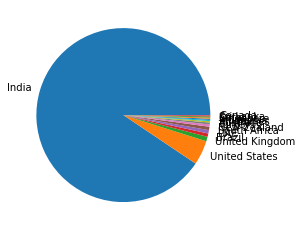

In [16]:
#pie chart
plt.pie(country_val,labels=country_names)

([<matplotlib.patches.Wedge at 0x26e9b0dd430>,
 [Text(-1.07479320772197, 0.23413577393196094, 'India'),
  Text(1.056503577535216, -0.3062681678779072, 'United States'),
  Text(1.093560093908513, -0.118854200644337, 'United Kingdom'),
  Text(1.0979610170116392, -0.06694479160298568, 'Brazil'),
  Text(1.0997733864424146, -0.022327079365287286, 'UAE')])

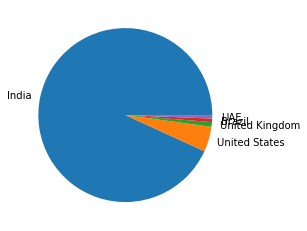

In [17]:
#Since pie chart is messed up we will plot top 5 countirs that uses zomato

plt.pie(country_val[0:5],labels=country_names[0:5])

([<matplotlib.patches.Wedge at 0x26e9b132970>,
 [Text(-1.079055178053478, 0.21363502221306527, 'India'),
  Text(1.0676486633072917, -0.26481376802982426, 'United States'),
  Text(1.0974500606462831, -0.07485562361953522, 'United Kingdom'),
  Text(1.0997704220141564, -0.022472624742216625, 'Brazil')],
 [Text(-0.5885755516655334, 0.11652819393439923, '93.78%'),
  Text(0.5823538163494317, -0.1444438734708132, '4.70%'),
  Text(0.5986091239888817, -0.04083034015611012, '0.87%'),
  Text(0.5998747756440852, -0.012257795313936339, '0.65%')])

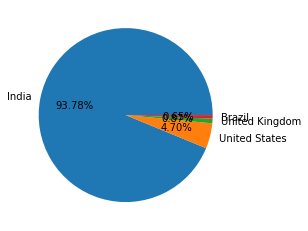

In [18]:
#adding percentage to chart

plt.pie(country_val[0:4],labels=country_names[0:4], autopct= '%1.2f%%')

In [19]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [20]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text'])

In [21]:
ratings = ratings.size().reset_index().rename(columns ={0 :'Rating Count'})

In [22]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

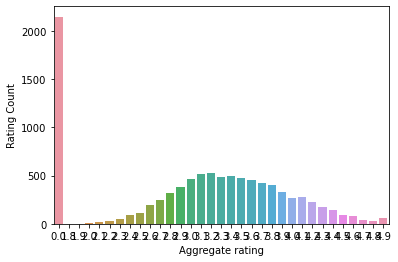

In [23]:
#Plotting and observations
sns.barplot(x ='Aggregate rating' ,y = 'Rating Count', data = ratings)
#data set>> x from data >> y from data 

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

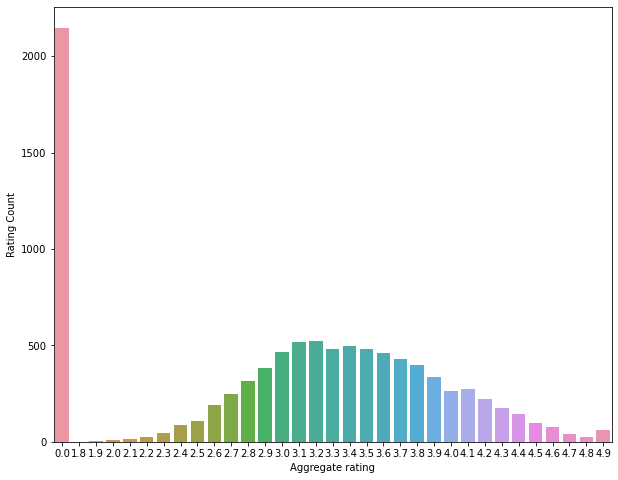

In [24]:
# increasing the size of the graph
import matplotlib
matplotlib.rcParams['figure.figsize']= (10,8)
sns.barplot(x ='Aggregate rating' ,y = 'Rating Count', data = ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

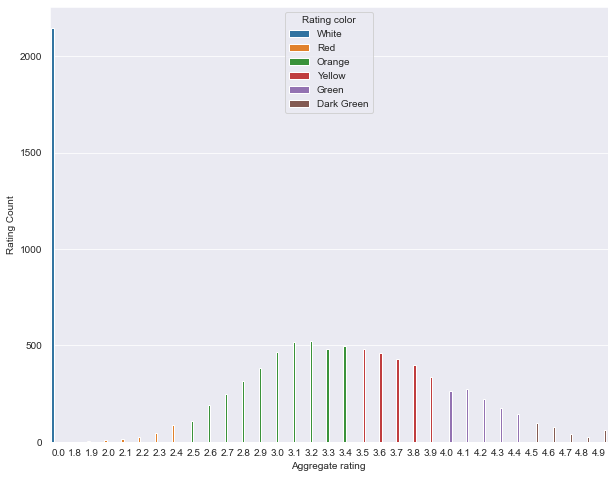

In [25]:
#adding same color as of ratings
#hue

import matplotlib
matplotlib.rcParams['figure.figsize']= (10,8)
sns.set_style("darkgrid")
sns.barplot(x ='Aggregate rating' ,y = 'Rating Count', data = ratings, hue='Rating color')

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

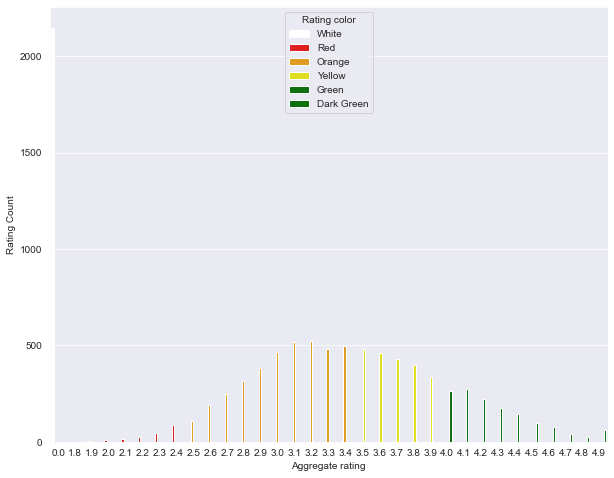

In [26]:
#color mapping 
#palette , in same order as in graph or in order as per your wish


import matplotlib
sns.set_style("darkgrid")
matplotlib.rcParams['figure.figsize']= (10,8)
sns.barplot(x ='Aggregate rating' ,y = 'Rating Count', data = ratings, hue='Rating color', palette=['white','red', 'orange','yellow','green','green'])

In [ ]:
#count plot(categorical variables)
sns.set_style("dark")
sns.countplot(data= ratings, x ="Rating color", palette = ['white','red', 'orange','yellow','green','green'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

In [ ]:
### finding the country names that has given 0 ratings
final_df.columns

In [ ]:
#Country Aggregate rating  Rating color

final_df[final_df['Rating color']== 'White'].groupby('Country').size()

In [ ]:
zero_rating_counts= final_df[final_df["Rating color"]== 'White'].groupby('Country').size().reset_index()
zero_rating_counts

In [ ]:
## finding out currencies used by each country

final_df.columns

In [ ]:
# 'Currency' 'Country'

final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

In [ ]:
##Countries with online deliveries

final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts()


In [ ]:
## Pie chart for cities distribution
city_values = final_df.City.value_counts().values
city_index = final_df.City.value_counts().index

matplotlib.rcParams['figure.figsize']= (20,15)
plt.pie(city_values[0:5], labels=city_index[0:5], autopct= '%1.1f%%')